In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns 

In [19]:
from tailnflows.utils import load_raw_data

raw_data = load_raw_data('2024-10-23-vi-divergences')

In [20]:
rows = []
for model, results in raw_data.items():
    for result in results:
        row = {
            'model': f"{model}-{result['loss_label']}",
            'seed': result['seed'],
            'dim': result['dim'],
            'nuisance_df': result['nuisance_df'],
            'loss_label': result['loss_label'],
            'elbo': result['tst_elbo'],
            'cubo': result['tst_cubo'],
            'tst_psis_k': result['tst_psis_k'][0],
            'ess': result['tst_ess'],
        }
        rows.append(row)

In [21]:
metrics = ['ess', 'cubo', 'elbo']
data = {}

for row in rows:
    model_loss = row['model']
    if model_loss not in data:
        data[model_loss] = {m: [] for m in metrics}

    for m in metrics:
        data[model_loss][m].append(row[m])
    

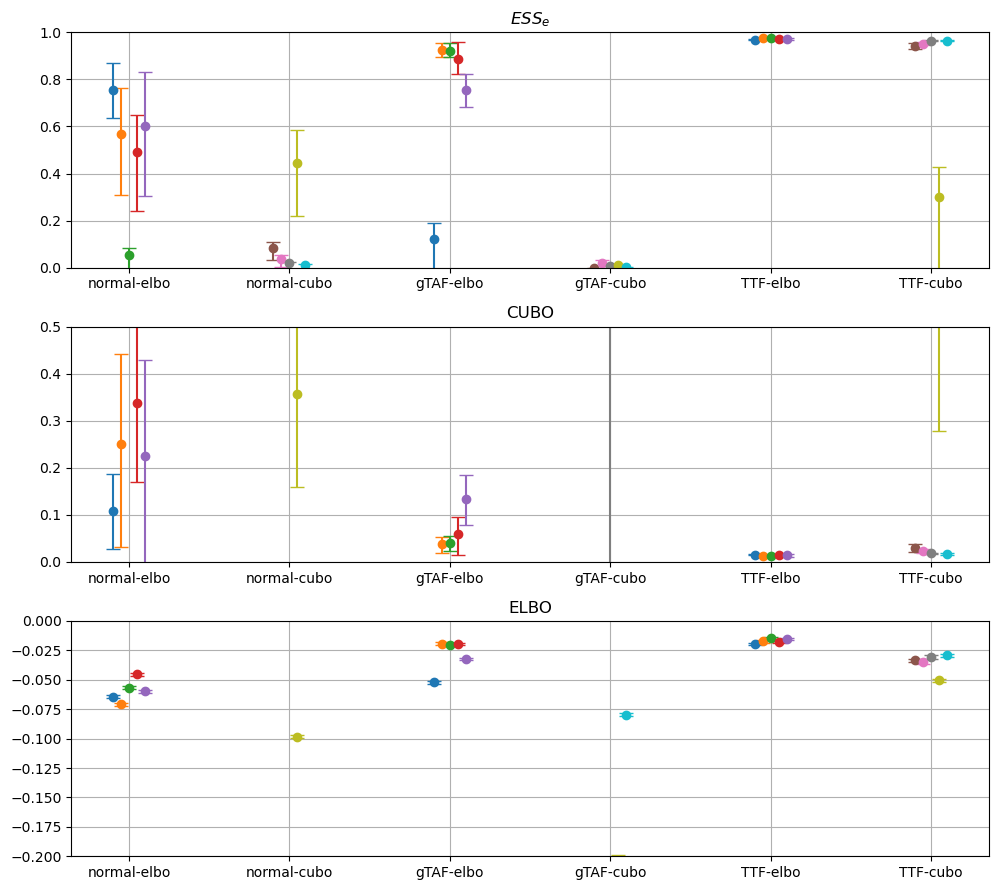

In [27]:
import matplotlib.pyplot as plt
import numpy as np
modellabs = {
    'nsf-neg_elbo': 'normal-elbo',
    'nsf-cubo': 'normal-cubo',
    'gtaf-neg_elbo': 'gTAF-elbo',
    'gtaf-cubo': 'gTAF-cubo',
    'ttf-neg_elbo': 'TTF-elbo',
    'ttf-cubo': 'TTF-cubo',
}
models = list(data.keys())
metrics = list(next(iter(data.values())).keys())

fig, axarr = plt.subplots(len(metrics), 1, figsize=(10, 9))

for metric_ix, metric in enumerate(metrics):
    ax = axarr[metric_ix]
    for mix, model in enumerate(models):
        repeat_data = data[model][metric]
        x_loc = (mix + 1) + np.linspace(-0.1, 0.1, len(repeat_data))
        for repeat, result in enumerate(repeat_data):
            ax.errorbar(
                x_loc[repeat], 
                result[1], 
                yerr=[[result[1] - result[0]], [result[2] - result[1]]], 
                fmt='o',
                capsize=5
            )

    if metric == 'ess':
        ax.set_ylim([0, 1])
        ax.set_title('$ESS_e$')
    elif metric == 'elbo':
        ax.set_ylim([-0.2, 0])
        ax.set_title('ELBO')
    elif metric == 'cubo':
        ax.set_title('CUBO')
        ax.set_ylim([0., 0.5])
    
    # ax.set_title(metric)
    ax.set_xticks(list(range(1, 1 +len(models))), [modellabs[m] for m in models])
    ax.grid()

plt.tight_layout()

/tmp/ipykernel_1331876/1803814461.py:2: FutureWarning: ['loss_label'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  pd.DataFrame(rows).groupby('model').agg(['mean'])[


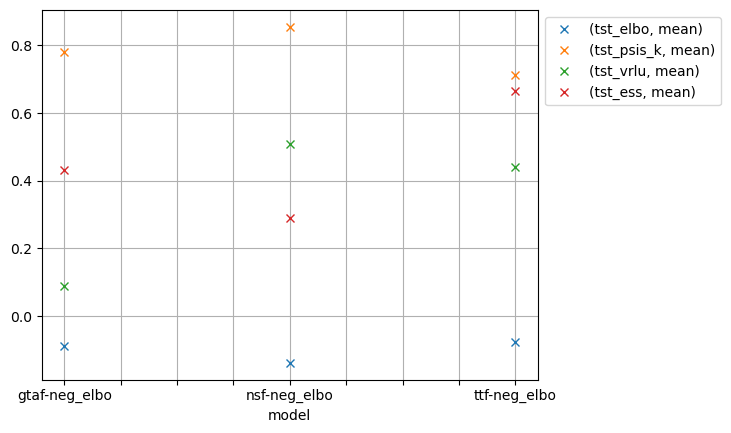

In [26]:
pd.options.display.float_format = '{:,.3f}'.format
pd.DataFrame(rows).groupby('model').agg(['mean'])[
    ['tst_elbo','tst_psis_k', 'tst_vrlu', 'tst_ess']
].plot(marker='x', linestyle='', legend=None)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()

In [14]:
pd.DataFrame(rows)

,model,seed,dim,nuisance_df,loss_label,elbo,cubo,tst_psis_k,ess
0,nsf-neg_elbo,0,5,1.0,neg_elbo,"(-0.254702091217041, -0.24606674909591675, -0....","(0.2444514036178589, 0.5687136650085449, 1.030...",1.037579,0.261916
1,nsf-neg_elbo,0,5,2.0,neg_elbo,"(-0.127574622631073, -0.12172795087099075, -0....","(0.2986571788787842, 0.5553739070892334, 0.912...",1.354214,0.308264
2,nsf-neg_elbo,0,5,30.0,neg_elbo,"(-0.005911979824304581, -0.004416417796164751,...","(0.0027760807424783707, 0.005074262619018555, ...",0.520188,0.989552
3,nsf-neg_elbo,0,10,1.0,neg_elbo,"(-0.5293529629707336, -0.5154739022254944, -0....","(1.4215941429138184, 1.9161319732666016, 3.289...",1.368404,0.017000
4,nsf-neg_elbo,0,10,2.0,neg_elbo,"(-0.2705484926700592, -0.26118260622024536, -0...","(1.2555396556854248, 1.7554850578308105, 3.085...",0.951030,0.028856
5,nsf-neg_elbo,0,10,30.0,neg_elbo,"(-0.01066480204463005, -0.008419599384069443, ...","(0.010087680071592331, 0.02159261703491211, 0....",0.582613,0.964565
6,nsf-neg_elbo,0,50,1.0,neg_elbo,"(-3.02764630317688, -2.9959604740142822, -2.96...","(0.3988320827484131, 0.657163143157959, 1.0337...",1.114783,0.019070
7,nsf-neg_elbo,0,50,2.0,neg_elbo,"(-1.5407347679138184, -1.5191521644592285, -1....","(1.0570220947265625, 1.2668232917785645, 1.605...",0.924272,0.028192
8,nsf-neg_elbo,0,50,30.0,neg_elbo,"(-0.06448805332183838, -0.0589301772415638, -0...","(0.0745513066649437, 0.09573101997375488, 0.11...",0.532925,0.834281
9,nsf-neg_elbo,1,5,1.0,neg_elbo,"(-0.24354276061058044, -0.23545776307582855, -...","(-0.005827799439430237, 0.09431982040405273, 0...",0.986960,0.653390


In [17]:
pd.DataFrame(rows).groupby(['dim', 'nuisance_df']).agg(['mean'])

/tmp/ipykernel_3559442/4215666709.py:1: FutureWarning: ['model', 'loss_label', 'elbo', 'cubo'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  pd.DataFrame(rows).groupby(['dim', 'nuisance_df']).agg(['mean'])


seed tst_psis_k       ess
                mean       mean      mean
dim nuisance_df                          
5   1.0          2.0   1.097670  0.393516
    2.0          2.0   1.270130  0.392179
    30.0         2.0   0.609354  0.988528
10  1.0          2.0   1.152202  0.113682
    2.0          2.0   0.987371  0.154256
    30.0         2.0   0.526344  0.970116
50  1.0          2.0   1.000649  0.011222
    2.0          2.0   0.949567  0.023007
    30.0         2.0   0.427899  0.840117